In [78]:
import pandas as pd
import missingno as msno
import os
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumGothic.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)




In [2]:
folder_path = 'C:/Users/user/Workspace/Python/농산품경락데이터전처리/data'
file_list = os.listdir(folder_path)
xlsx_files = [file for file in file_list if file.endswith('.xlsx')]

In [3]:
df_list = []
for file in xlsx_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

c:\Users\user\Workspace\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\user\Workspace\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\user\Workspace\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
combined_df.head()

,날짜,품목,등급,거래단위,평균가
0,2023.08.01,고구마,특,10키로상자,43185
1,2023.08.01,고구마,상,10키로상자,37962
2,2023.08.01,고구마,중,10키로상자,29657
3,2023.08.01,고구마,하,10키로상자,18464
4,2023.08.01,호박밤 고구마,특,10키로상자,43244


In [5]:
combined_df.value_counts

<bound method DataFrame.value_counts of                  날짜         품목 등급    거래단위    평균가
0        2023.08.01        고구마  특  10키로상자  43185
1        2023.08.01        고구마  상  10키로상자  37962
2        2023.08.01        고구마  중  10키로상자  29657
3        2023.08.01        고구마  하  10키로상자  18464
4        2023.08.01    호박밤 고구마  특  10키로상자  43244
...             ...        ... ..     ...    ...
1275587  2018.01.01  오렌지 네블 수입  중  18키로상자      0
1275588  2018.01.01  오렌지 네블 수입  하  18키로상자      0
1275589  2018.01.01      망고 수입  특   5키로상자      0
1275590  2018.01.01      망고 수입  상   5키로상자      0
1275591  2018.01.01    블루베리 수입  상   1키로상자      0

[1275592 rows x 5 columns]>

In [ ]:
msno.matrix(combined_df)

In [13]:
df = combined_df[combined_df['평균가']!= 0]
df.shape

(1063547, 5)

In [14]:
# Summary statistics for numerical variables
numerical_summary = df["평균가"].describe()

# Frequency counts for categorical variables
product_counts = df["품목"].value_counts()
grade_counts = df["등급"].value_counts()
trade_unit_counts = df["거래단위"].value_counts()

numerical_summary, product_counts, grade_counts, trade_unit_counts

(count    1.063547e+06
 mean     2.858491e+04
 std      2.252575e+05
 min      2.500000e+01
 25%      7.341000e+03
 50%      1.460900e+04
 75%      2.656250e+04
 max      1.595000e+07
 Name: 평균가, dtype: float64,
 품목
 양파             26211
 수박(일반)         22093
 생표고            20740
 감귤             17907
 양파 자주색         15968
                ...  
 복숭아 천중도(백)        28
 복숭아 레드골드(천)       27
 복숭아 암킹(천)         20
 키위 기타 수입          16
 복숭아 환타지아(천)        9
 Name: count, Length: 304, dtype: int64,
 등급
 상    297656
 하    291201
 중    289946
 특    184744
 Name: count, dtype: int64,
 거래단위
 10키로상자     236536
 2키로상자      114147
 5키로상자      112891
 4키로상자      100661
 8키로상자       59759
             ...  
 5000키로        203
 7키로개          184
 9키로개          184
 8톤트럭          159
 7.5키로묶음       126
 Name: count, Length: 62, dtype: int64)

C:\Users\user\AppData\Local\Temp\ipykernel_20976\2976570900.py:34: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20976\2976570900.py:34: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20976\2976570900.py:34: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20976\2976570900.py:34: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20976\2976570900.py:34: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20976\2976570900.py:34: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout()
C:\Use

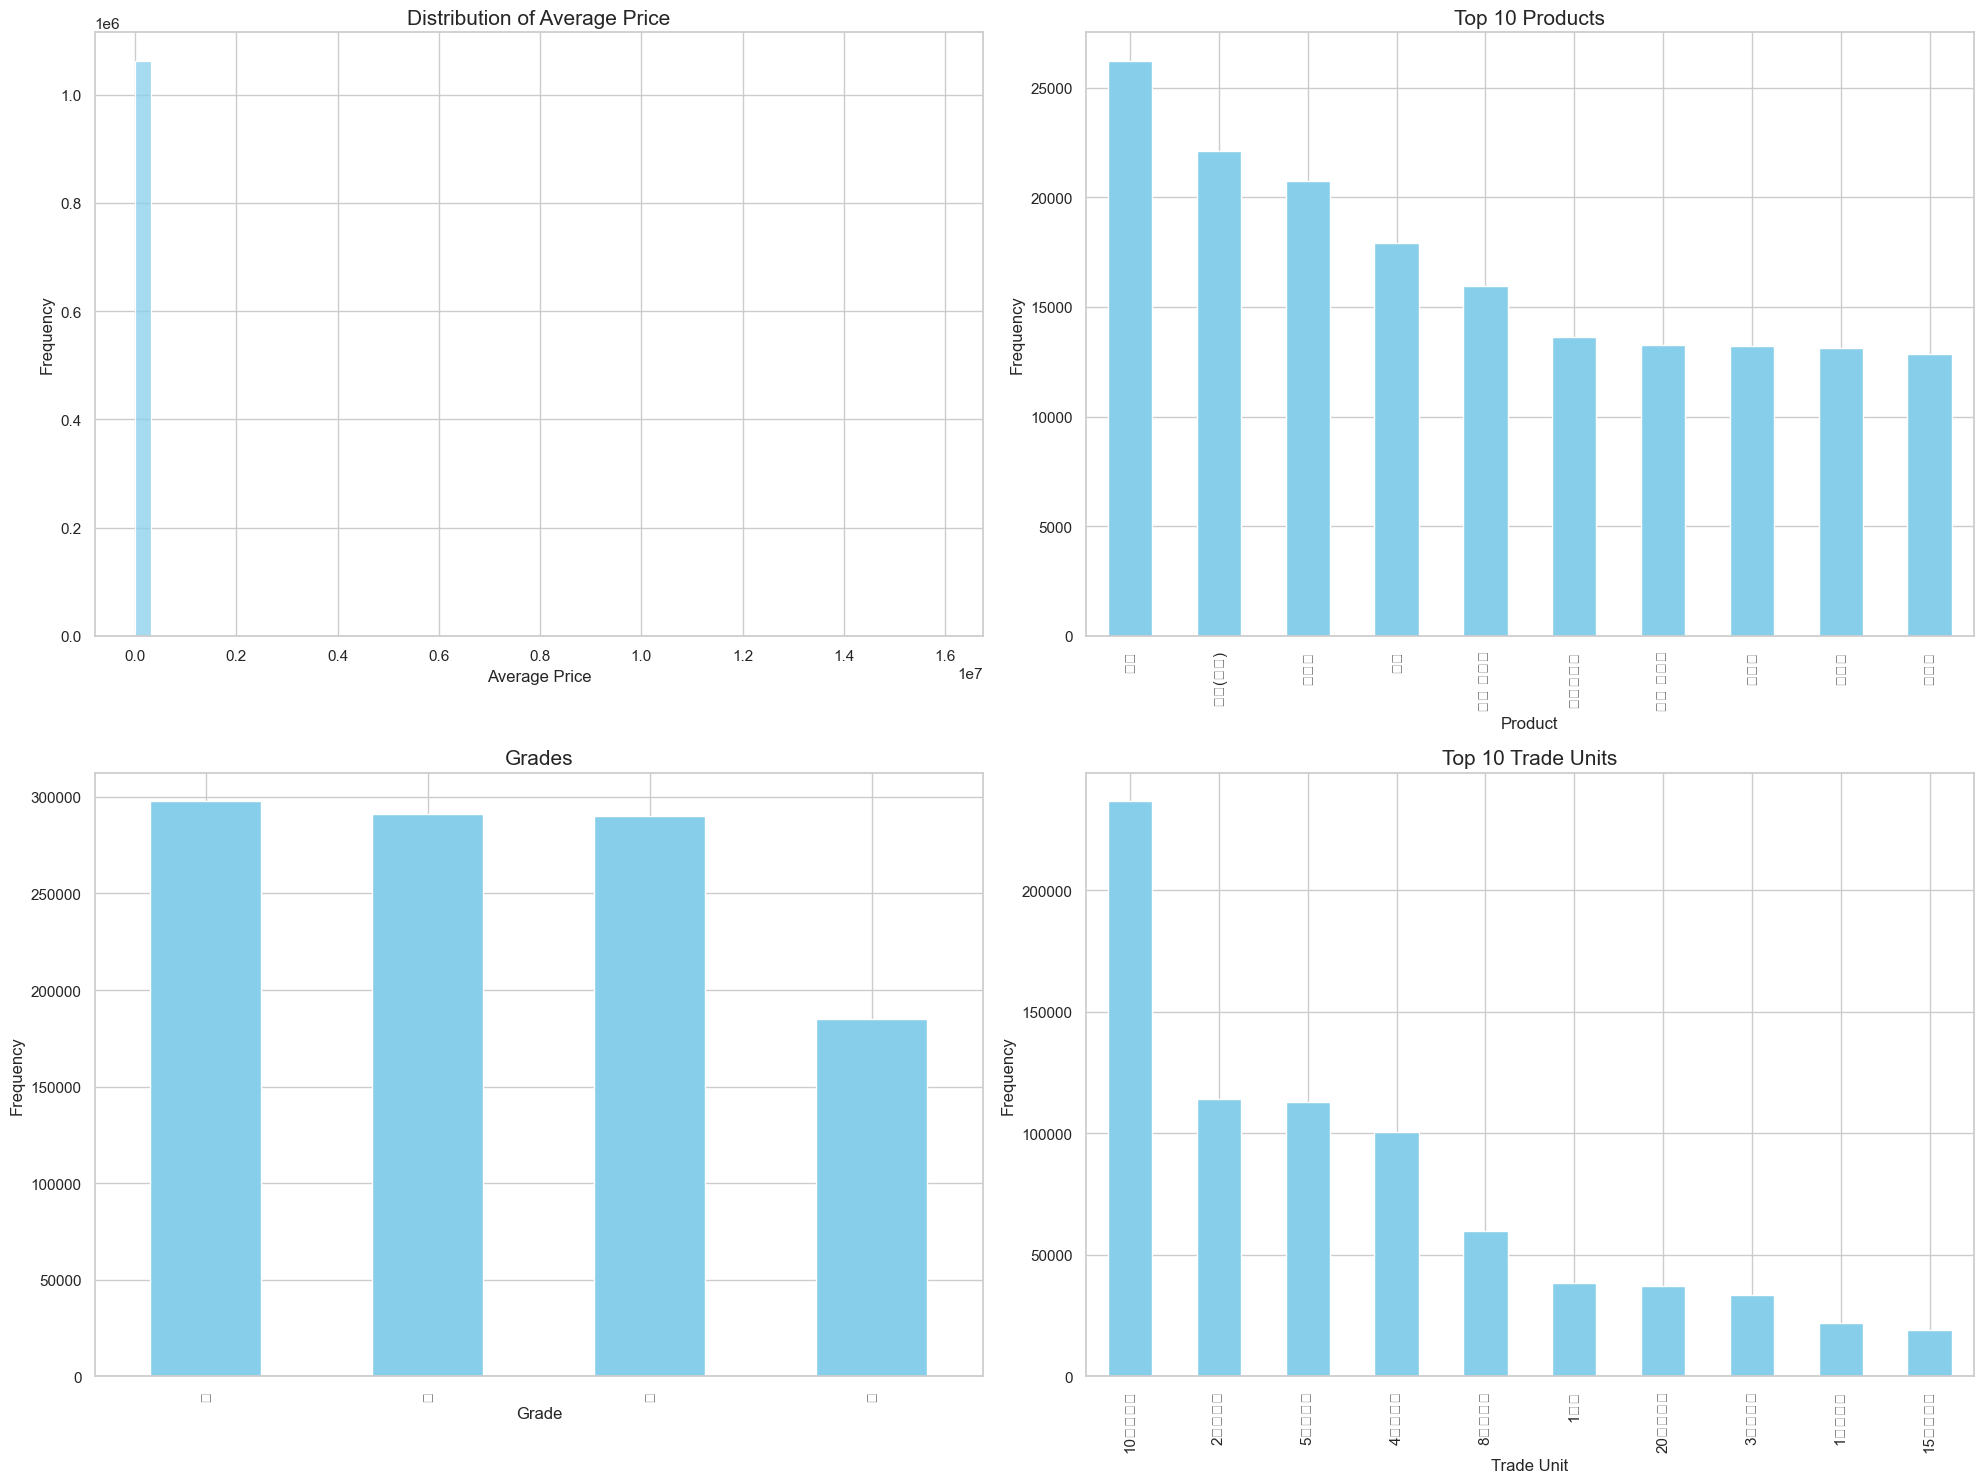

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

# Set plot style
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Histogram for "평균가" (Average Price)
sns.histplot(df["평균가"], bins=50, ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Distribution of Average Price', fontsize=15)
ax[0, 0].set_xlabel('Average Price', fontsize=12)
ax[0, 0].set_ylabel('Frequency', fontsize=12)

# Bar plot for "품목" (Product)
product_counts[:10].plot(kind='bar', ax=ax[0, 1], color='skyblue')
ax[0, 1].set_title('Top 10 Products', fontsize=15)
ax[0, 1].set_xlabel('Product', fontsize=12)
ax[0, 1].set_ylabel('Frequency', fontsize=12)

# Bar plot for "등급" (Grade)
grade_counts.plot(kind='bar', ax=ax[1, 0], color='skyblue')
ax[1, 0].set_title('Grades', fontsize=15)
ax[1, 0].set_xlabel('Grade', fontsize=12)
ax[1, 0].set_ylabel('Frequency', fontsize=12)

# Bar plot for "거래단위" (Trade Unit)
trade_unit_counts[:10].plot(kind='bar', ax=ax[1, 1], color='skyblue')
ax[1, 1].set_title('Top 10 Trade Units', fontsize=15)
ax[1, 1].set_xlabel('Trade Unit', fontsize=12)
ax[1, 1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [80]:
df.to_csv('분석용.csv')

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 품목별로 데이터를 분리하고 계절성 지수를 계산
seasonal_strength = {}

for item in df['품목'].unique():
    item_data = df[df['품목'] == item].copy()
    item_data.set_index('날짜', inplace=True)
    item_data = item_data.resample('W').sum()  # 주별로 리샘플링
    if len(item_data) < 3:  # 계절성을 계산하기에 충분한 데이터가 없는 경우
        continue
    try:
        decomposition = seasonal_decompose(item_data['평균가'], period=52, extrapolate_trend='freq')  # 주간 데이터이므로 period=52
        seasonal_strength[item] = decomposition.seasonal.max() - decomposition.seasonal.min()
    except:
        continue

# 계절성 지수가 높은 상위 20개 품목을 선택
top_20_seasonal_items = sorted(seasonal_strength, key=seasonal_strength.get, reverse=True)[:20]
top_20_seasonal_items

['다발무',
 '감 말랭이',
 '실파',
 '미나리',
 '만감 천혜향',
 '홍고추',
 '생표고',
 '녹광고추',
 '생대추',
 '깐쪽파',
 '청양고추',
 '감귤',
 '오이맛고추',
 '달래(일반)',
 '감 대봉시',
 '사과 미야비',
 '딸기 장희',
 '메론 머스크',
 '복숭아 백도 기타',
 '저장 양파']

C:\Users\user\AppData\Local\Temp\ipykernel_20976\3798580596.py:40: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\user\AppData\Local\Temp\ipykernel_20976\3798580596.py:40: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\user\AppData\Local\Temp\ipykernel_20976\3798580596.py:40: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\user\AppData\Local\Temp\ipykernel_20976\3798580596.py:40: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\user\AppData\Local\Temp\ipykernel_20976\3798580596.py:40: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\user\AppData\Local\Temp\ipykernel_20976\37985

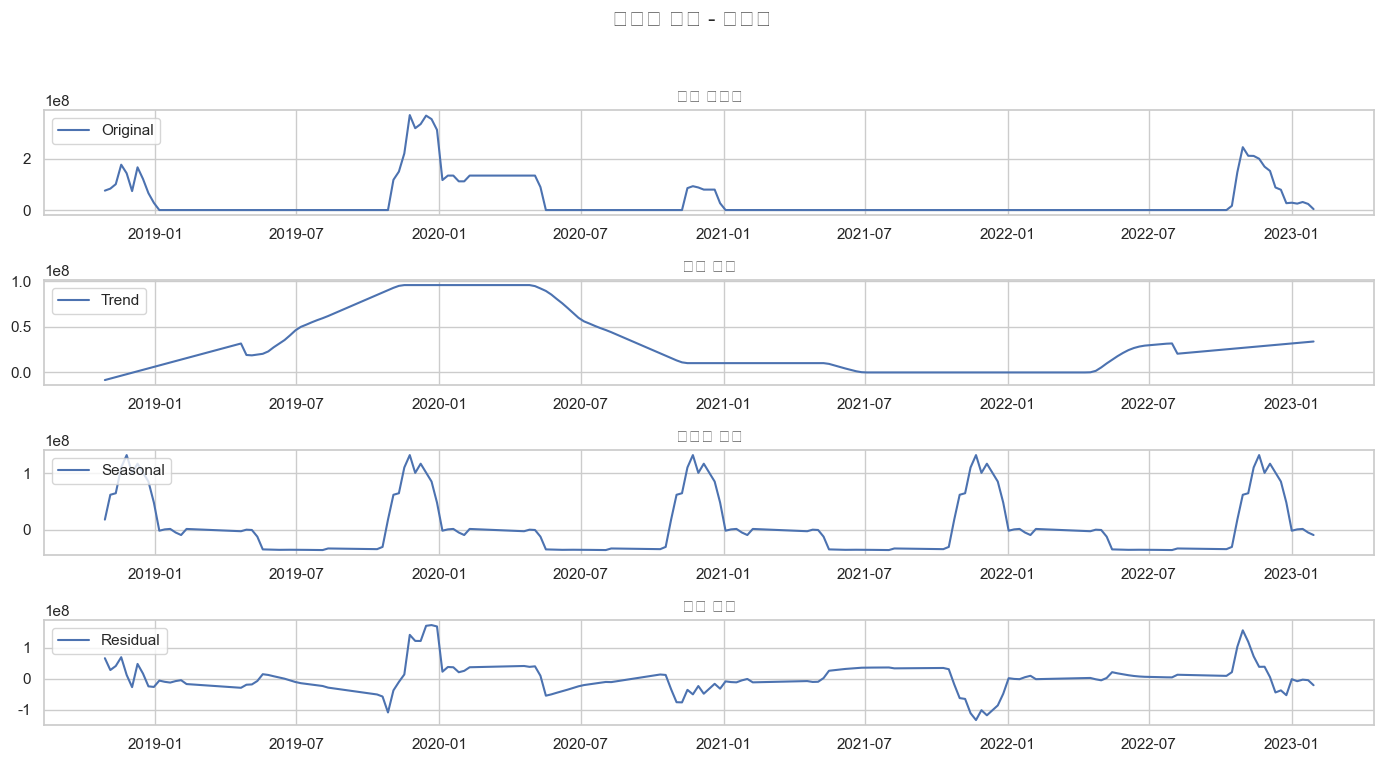

In [82]:
import matplotlib.pyplot as plt

# 첫 번째 품목인 '다발무'의 데이터를 선택
item_name = top_20_seasonal_items[0]
item_data = df[df['품목'] == item_name].copy()
item_data.set_index('날짜', inplace=True)
item_data = item_data.resample('W').sum()  # 주별로 리샘플링

# 시계열 분해 (추세, 계절성, 잔차)
decomposition = seasonal_decompose(item_data['평균가'], period=52, extrapolate_trend='freq')

# 시계열 분해 결과를 시각화
plt.figure(figsize=(14, 8))
plt.suptitle(f"시계열 분석 - {item_name}", fontsize=16)

# 원래 시계열
plt.subplot(4, 1, 1)
plt.plot(item_data['평균가'], label='Original')
plt.legend(loc='upper left')
plt.title('원래 시계열')

# 추세 성분
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('추세 성분')

# 계절성 성분
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('계절성 성분')

# 잔차 성분
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('잔차 성분')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

c:\Users\user\Workspace\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Workspace\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Workspace\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Workspace\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


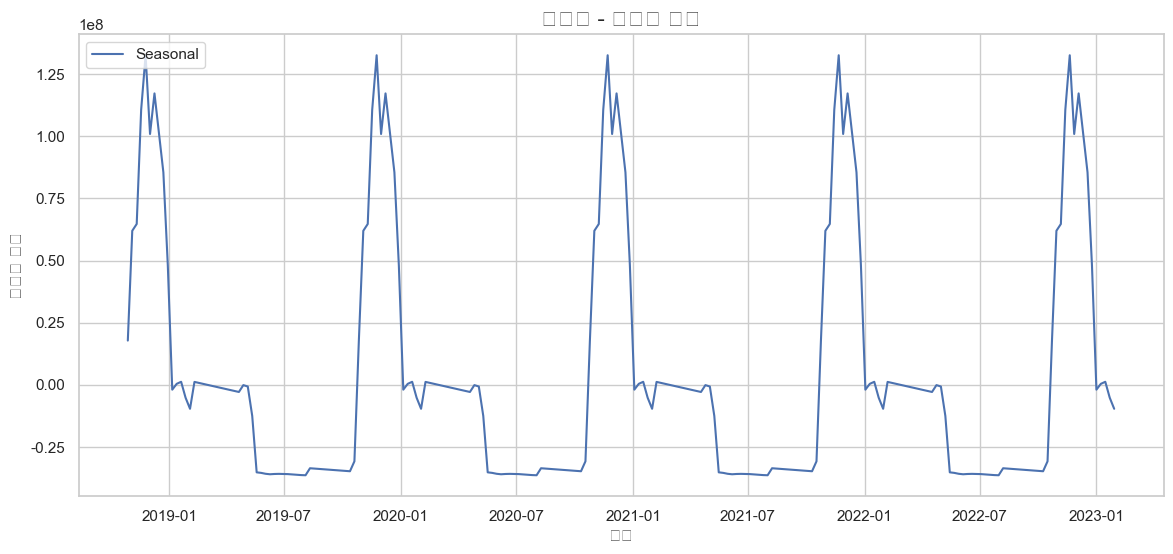

(Timestamp('2018-11-25 00:00:00'), Timestamp('2019-08-04 00:00:00'))

In [83]:
# 계절성 성분을 시각화
plt.figure(figsize=(14, 6))
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title(f"{item_name} - 계절성 성분", fontsize=16)
plt.xlabel('날짜')
plt.ylabel('계절성 지수')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# 가장 비싼 시기와 저렴한 시기를 찾음
most_expensive_period = decomposition.seasonal.idxmax()
least_expensive_period = decomposition.seasonal.idxmin()

most_expensive_period, least_expensive_period

In [85]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXGeneral',
 'cmr10',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'cmtt10',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'STIXGeneral',
 'cmsy10',
 'cmex10',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'cmss10',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'Century Gothic',
 'Bell MT',
 'Gill Sans MT',
 'Bauhaus 93',
 'D2Coding',
 'Trebuchet MS',
 'Gulim',
 'Broadway',
 'Showcard Gothic',
 'Microsoft Uighur',
 'Rage Italic',
 'Gloucester MT Extra Condensed',
 'Myanmar Text',
 'Magic R',
 'Century Gothic',
 'Goudy Stout',
 'Perpetua',
 'Candara',
 'Segoe UI',
 'Segoe Script',
 'Ami R',
 'Cali